<a href="https://colab.research.google.com/github/nazaninzareirad/Amazon-Review-Analysis/blob/NLP/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

google_drive_url = 'https://drive.google.com/file/d/1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW/view?usp=sharing'
file_id = google_drive_url.split("/")[-2]
output = 'train_data.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
url_extra = 'https://drive.google.com/file/d/1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h/view?usp=drive_link'
extra_id = url_extra.split("/")[-2]
output1 = 'extra_data.csv'
gdown.download(f'https://drive.google.com/uc?id={extra_id}', output1, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
To: /content/train_data.csv
100%|██████████| 635M/635M [00:02<00:00, 221MB/s]
Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/extra_data.csv
100%|██████████| 97.3M/97.3M [00:00<00:00, 189MB/s]


'extra_data.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train_data.csv', low_memory=False)

In [ ]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'],
      dtype='object')

In [ ]:
for i in range(10):
  print(df['reviewText'][i])

In [ ]:
df.info()

**Distribution of overall column**

In [ ]:
df['overall'].plot(kind='hist', bins=5, rwidth=0.9, color='#607c8e')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

**Is the data normally distributed?**

In [ ]:
# Shapiro-Wilk test for normality
col = 'overall'
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df[col])

if shapiro_p_value < 0.05:
    print(f'The {col} column does not follow a normal distribution (p-value: {shapiro_p_value})')
else:
    print(f'The {col} column follows a normal distribution (p-value: {shapiro_p_value})')


According to the distribution & normality test we can clearly say that the data is not balanced, in fact it's right skew & most of the ratings are 4 or 5.

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# sentiment categories
positive_reviews = df[df['overall'].isin([4, 5])]['reviewText']
neutral_reviews = df[df['overall'] == 3]['reviewText']
negative_reviews = df[df['overall'].isin([1, 2])]['reviewText']

In [ ]:
# word clouds for each sentiment category
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords.words('english')).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(' '.join(positive_reviews), 'Positive Sentiment')
generate_word_cloud(' '.join(neutral_reviews), 'Neutral Sentiment')
generate_word_cloud(' '.join(negative_reviews), 'Negative Sentiment')

In [ ]:
# word clouds for the intersection of positive and negative reviews
intersection_reviews = positive_reviews[positive_reviews.isin(negative_reviews)]
generate_word_cloud(' '.join(intersection_reviews), 'Intersection of Positive and Negative Reviews')

In [ ]:
# top 10 reviewers with the most vote counts
df['vote'] = df['vote'].str.replace(',', '').fillna(0).astype(float)
top_10_reviewers = df.groupby('reviewerName')['vote'].sum().sort_values(ascending=False).head(10)
print(top_10_reviewers)

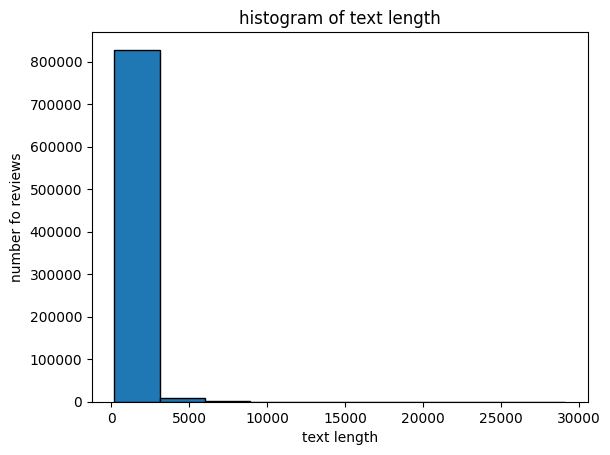

In [ ]:
plt.hist(df["reviewText"].str.len(), bins=10, edgecolor="black")
plt.xlabel("text length")
plt.ylabel("number fo reviews")
plt.title("histogram of text length")
plt.show()

# top_10_products = df[df["overall"] == 5].groupby(["نام_برند", "نام_محصول"]).size().nlargest(10)
# print(top_10_products)

# # تحلیل شماره ۶: پیدا کردن ۱۰ برند با بیشترین تعداد نظر و محاسبه میانگین امتیاز هر کدام
# top_10_brands = df.groupby("نام_برند").agg({"تعداد_نظر": "sum", "امتیاز": "mean"}).nlargest(10, "تعداد_نظر")
# print(top_10_brands)


In [ ]:
# Find the top 10 products with the most vote counts
top_10_products = df.groupby('asin')['vote'].sum().sort_values(ascending=False).head(10)
print(top_10_products)

# Find the top 10 brands with the most vote counts
top_10_brands = df.groupby('brand')['vote'].sum().sort_values(ascending=False).head(10)
print(top_10_brands)


In [ ]:
df1 = pd.read_csv('extra_data.csv')
df1.head()